In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys
from numpy.random import multivariate_normal
from matplotlib.colors import LogNorm

### Read the actual data

In [22]:
os.listdir('data/labelledData')

['fit_results_run_30383_no_avg_labelled_tails.csv',
 'fit_results_run_30400_no_avg_labelled_tails.csv',
 'fit_results_run_30389_no_avg_labelled_tails.csv',
 'fit_results_run_30405_no_avg_labelled_tails.csv',
 'fit_results_run_30418_no_avg_labelled_tails.csv',
 'fit_results_run_30373_no_avg_labelled_tails.csv',
 'fit_results_run_30360_no_avg_labelled_tails.csv',
 'fit_results_run_30402_no_avg_labelled_tails.csv',
 'fit_results_run_30416_no_avg_labelled_tails.csv',
 'fit_results_run_30387_no_avg_labelled_tails.csv',
 'fit_results_run_30421_no_avg_labelled_tails.csv',
 'fit_results_run_30426_no_avg_labelled_tails.csv',
 'fit_results_run_30398_no_avg_labelled_tails.csv',
 'fit_results_run_30404_no_avg_labelled_tails.csv',
 'fit_results_run_30414_no_avg_labelled_tails.csv',
 'fit_results_run_30378_no_avg_labelled_tails.csv',
 'fit_results_run_30394_no_avg_labelled_tails.csv',
 'fit_results_run_30430_no_avg_labelled_tails.csv',
 'fit_results_run_30371_no_avg_labelled_tails.csv',
 'fit_result

In [88]:
# data_df = pd.read_csv('data/labelledData/fit_results_run_30400_no_avg_labelled_tails.csv')
data_df = pd.DataFrame()
for i,f in enumerate(os.listdir('data/labelledData')):
    if i==0:
        data_df = pd.read_csv(f'data/labelledData/{f}')
    # else:
    #     data_df = pd.concat([data_df, pd.read_csv(f'data/labelledData/{f}')], axis=0)
colmns = data_df.columns
data_df.drop(columns=colmns[0], inplace=True)
cols_of_interest = ['t', 'A_0', 't_p', 'k3', 'k4', 'k5', 'k6']
data_df.head()

,#Ch.#,t,E(t),A_0,E(A_0),t_p,E(t_p),k3,E(k3),k4,E(k4),k5,E(k5),k6,E(k6),Chi2/DOF,integral_R,max_deviation,class
0,1,5.027412,0.013209,41634.53909,257.478656,2.191244,0.014733,0.967931,0.020082,1.267723,0.029534,1.852811e-09,0.001092,0.000380,0.000050,7.938416,-201.475639,-5.861768,c1
1,5,5.049220,0.012699,41831.38712,168.464011,2.147750,0.013390,1.006527,0.019745,1.301070,0.030544,3.355374e-02,0.000043,0.033594,0.000043,6.288027,-9.090724,-2.186695,c1
2,6,5.040480,0.013286,41869.38493,192.820079,2.246669,0.014435,0.980430,0.021021,1.262839,0.030414,3.446723e-06,0.001186,0.000393,0.000130,6.475971,-216.775870,-6.468274,c1
3,9,5.011440,0.013034,41566.10730,610.198040,2.187867,0.014432,0.916121,0.018004,1.199817,0.028194,1.085517e-02,0.000421,0.010857,0.000421,6.470285,-4.352290,-3.282015,c1
4,11,5.052980,0.013998,41525.65686,412.614605,2.184450,0.015606,1.063343,0.028196,1.356845,0.037323,1.973439e-02,0.002561,0.021843,0.002683,6.062847,-551.066730,-17.801190,c1


## Visualize data

In [89]:
def visualize(data, columns, type):
    '''
       data: the dataframe to visualize
       columns: the columns of interest
       type: the type of plot to generate. The following options are supported:
            - hist: for 1d histograms (distribution)
            - corr: for 2d histograms showing the correlation between variables
    '''
    N_var = len(columns)
    if type=='hist':
        fig, ax = plt.subplots(1, N_var, figsize=(5*N_var, 5))
        for i, c in enumerate(columns):
            ax[i].hist(data[c], bins=int(len(data[c])/20), histtype='step')
            ax[i].set_xlabel(c)
            ax[i].set_ylabel('#')
            ax[i].set_title(c)
            ax[i].grid(True)
        plt.tight_layout()
        plt.show()
    elif type=='corr':
        for c1 in cols_of_interest:
            fig, ax = plt.subplots(1, N_var, figsize=(5*N_var, 5))
            for i, c2 in enumerate(cols_of_interest):
                h1 = ax[i].hist2d(data[c1], data[c2], 
                bins=30, norm=LogNorm(),cmap='viridis')
                cbar1 = plt.colorbar(h1[3])
                cbar1.set_label('Counts')
                ax[i].set_xlabel(c1)
                ax[i].set_ylabel(c2)
                ax[i].set_title(f'{c1} vs {c2}')
                ax[i].grid(True)
            plt.tight_layout()
            plt.show()
    else:
        print("Invalid type.")

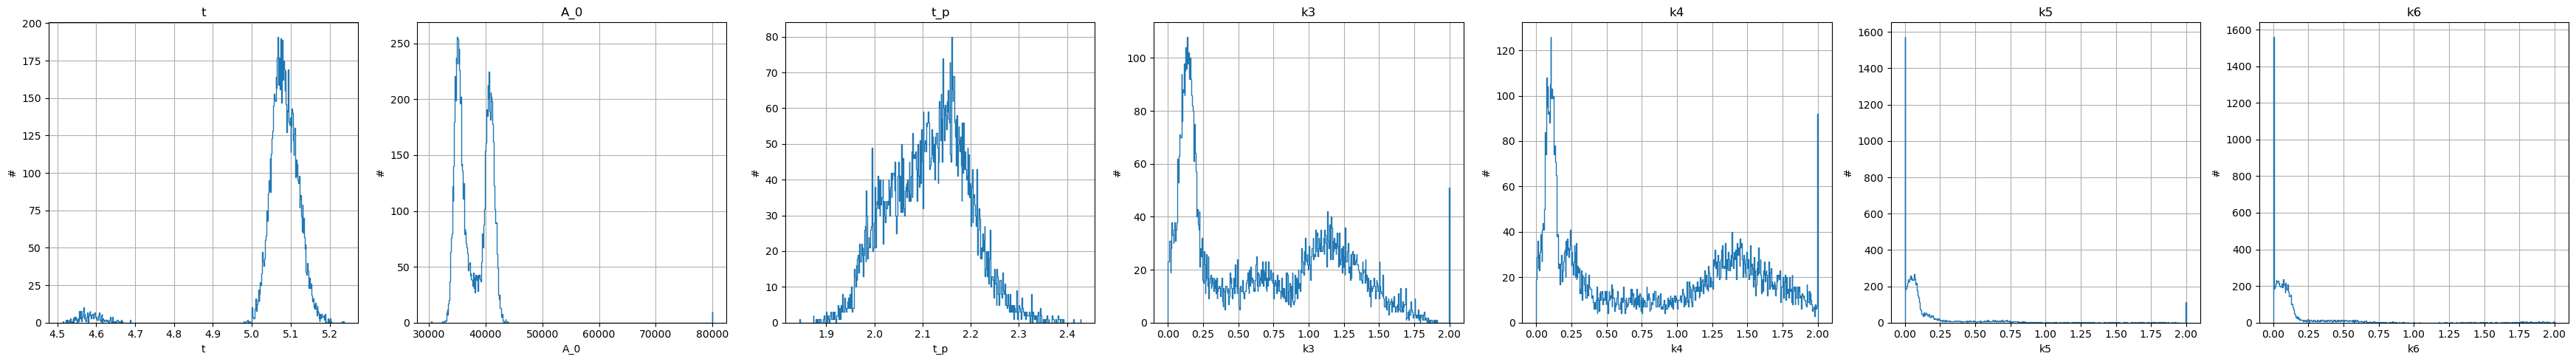

In [90]:
visualize(data=data_df, columns=cols_of_interest, type='hist')

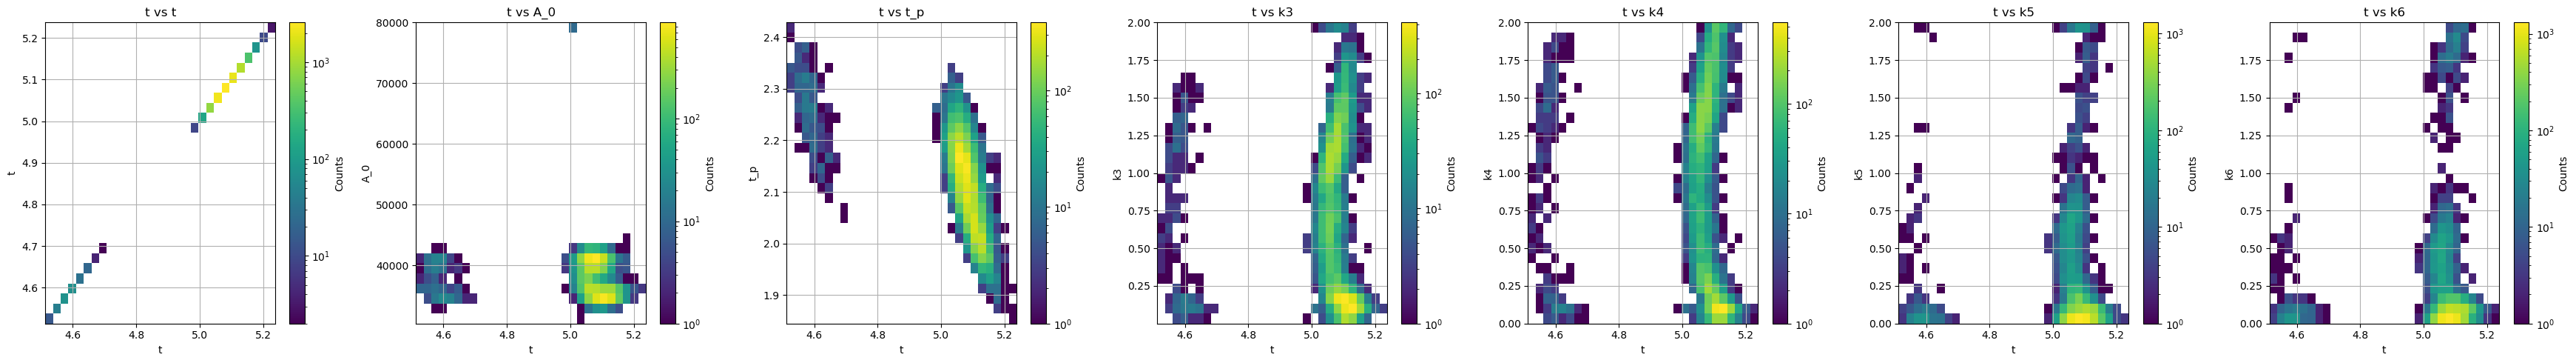

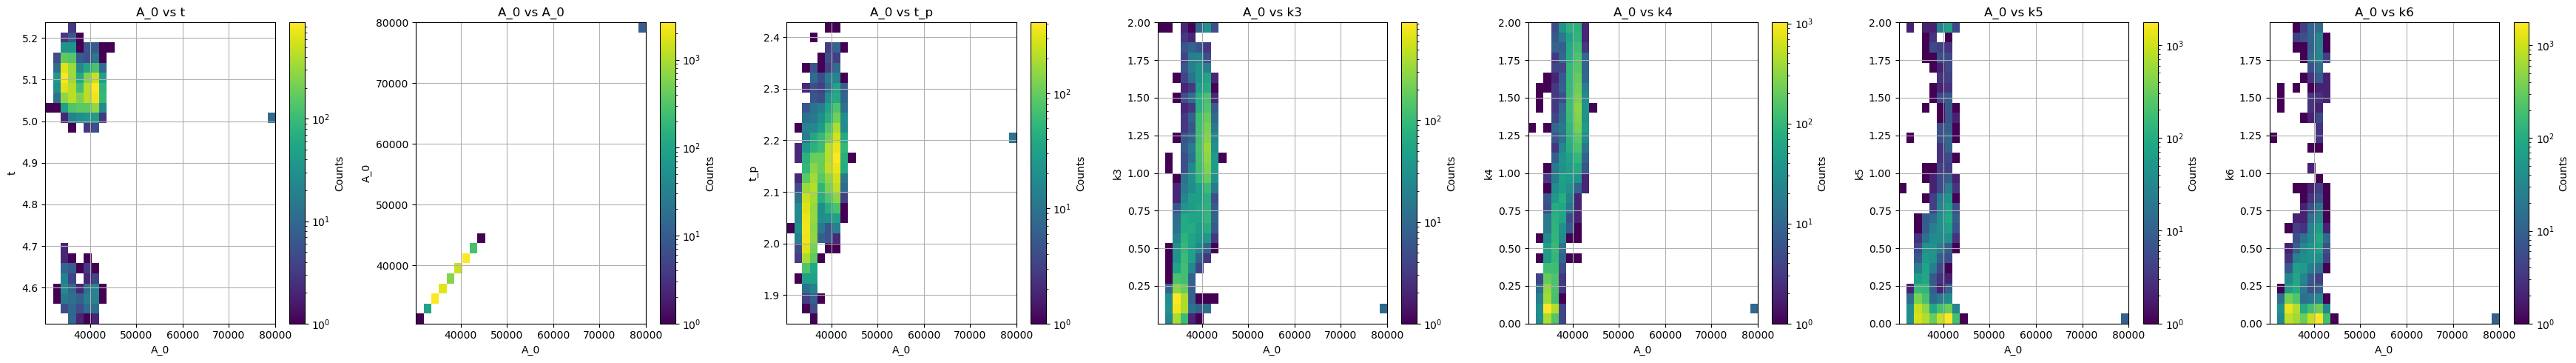

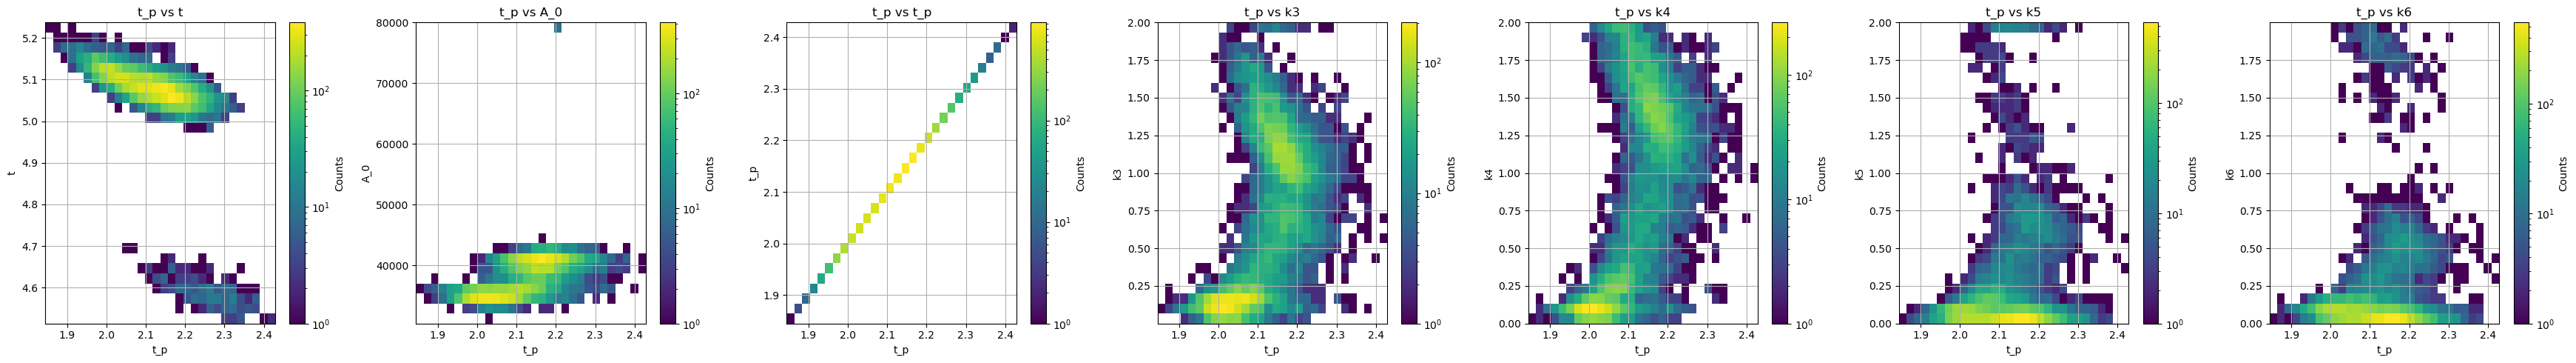

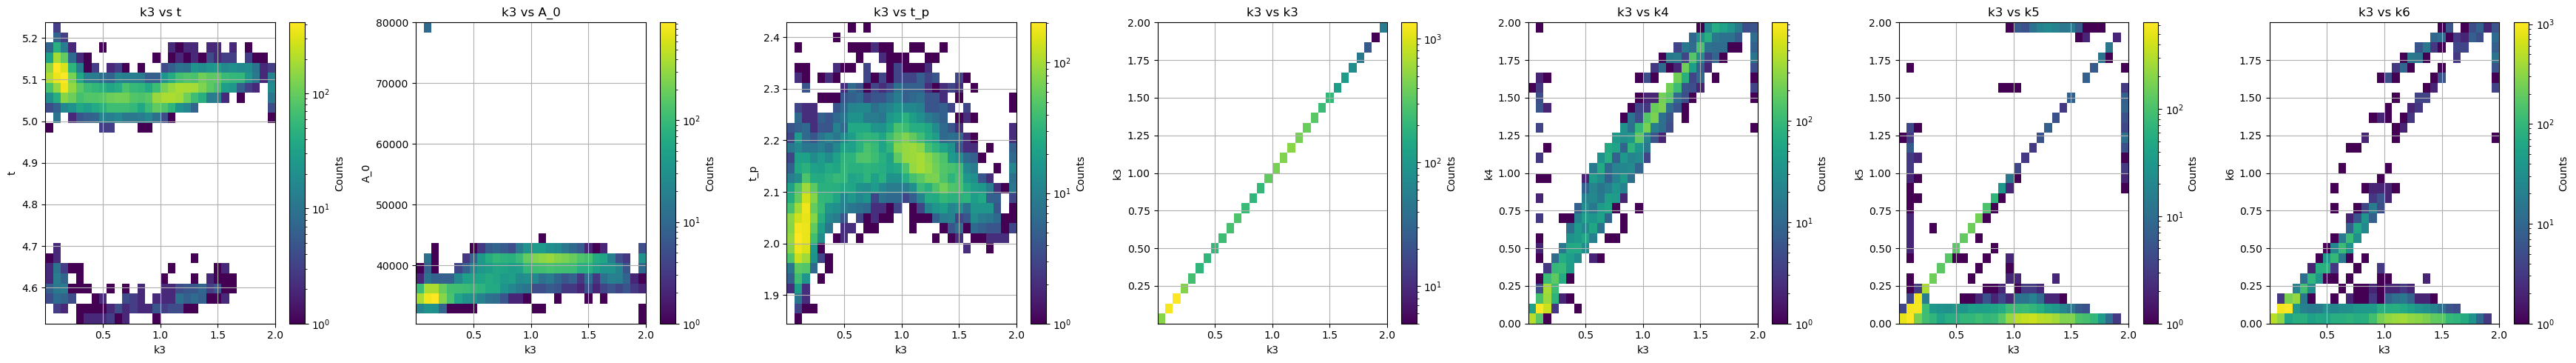

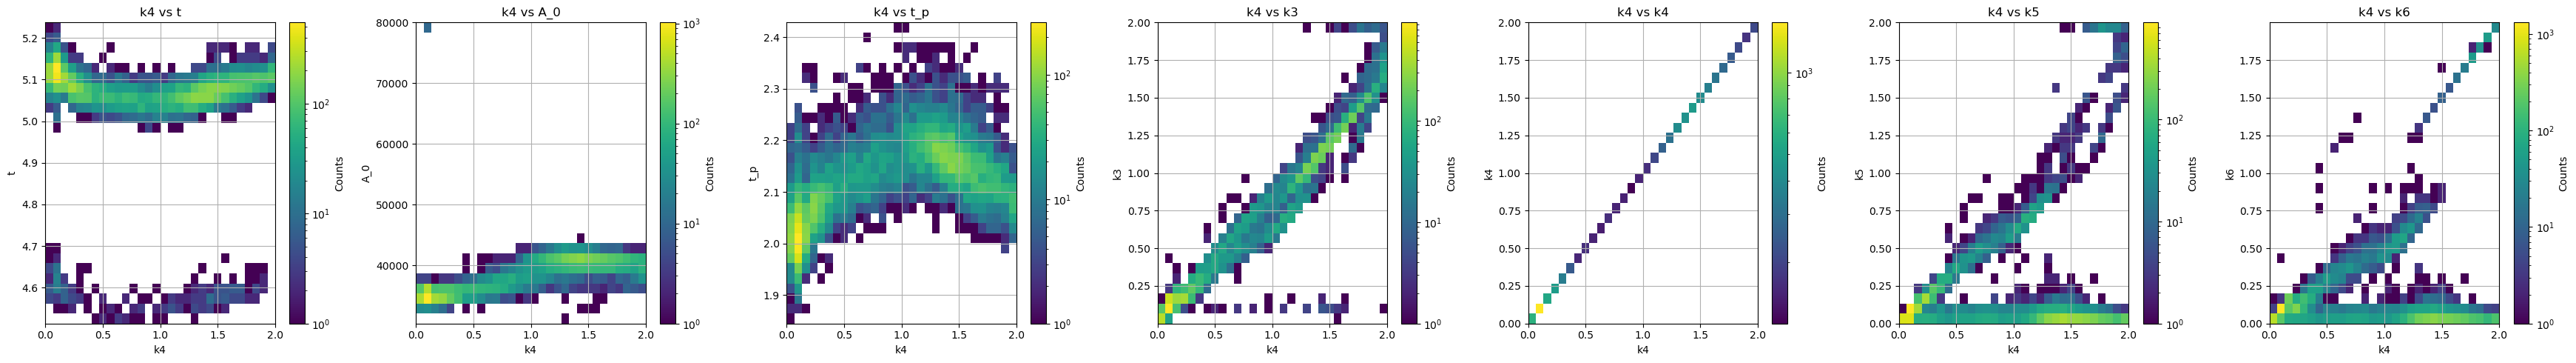

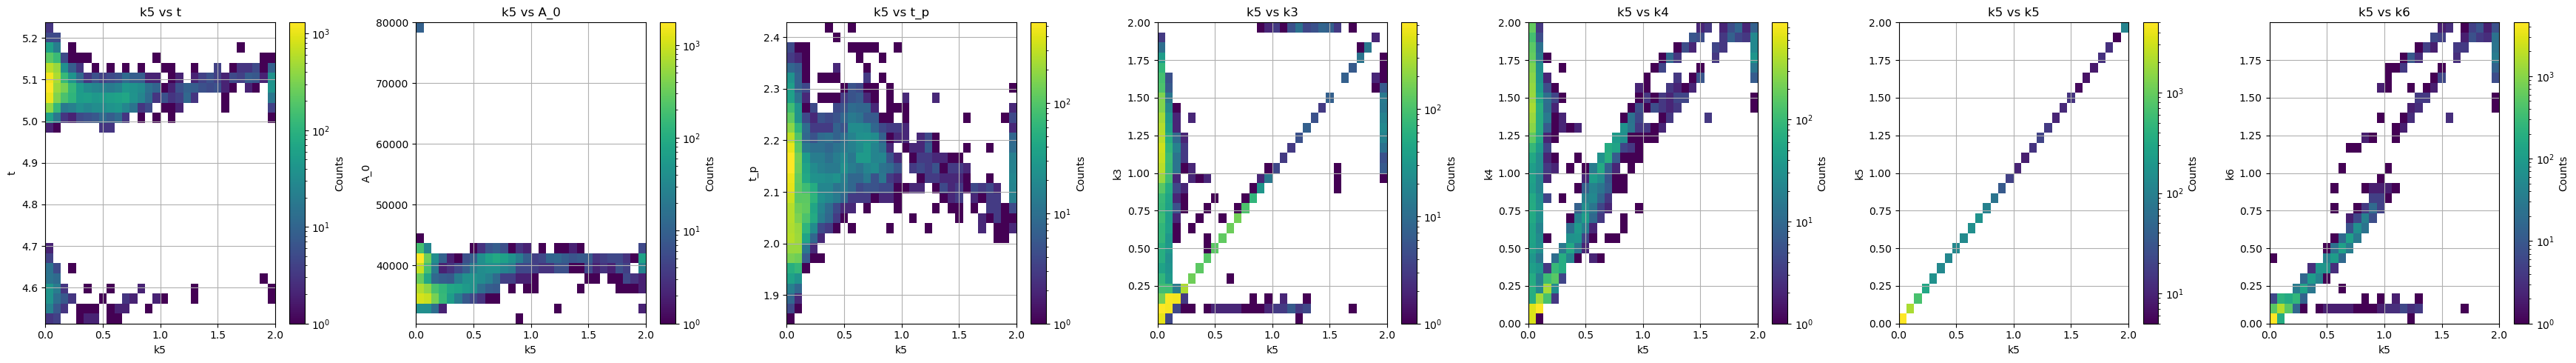

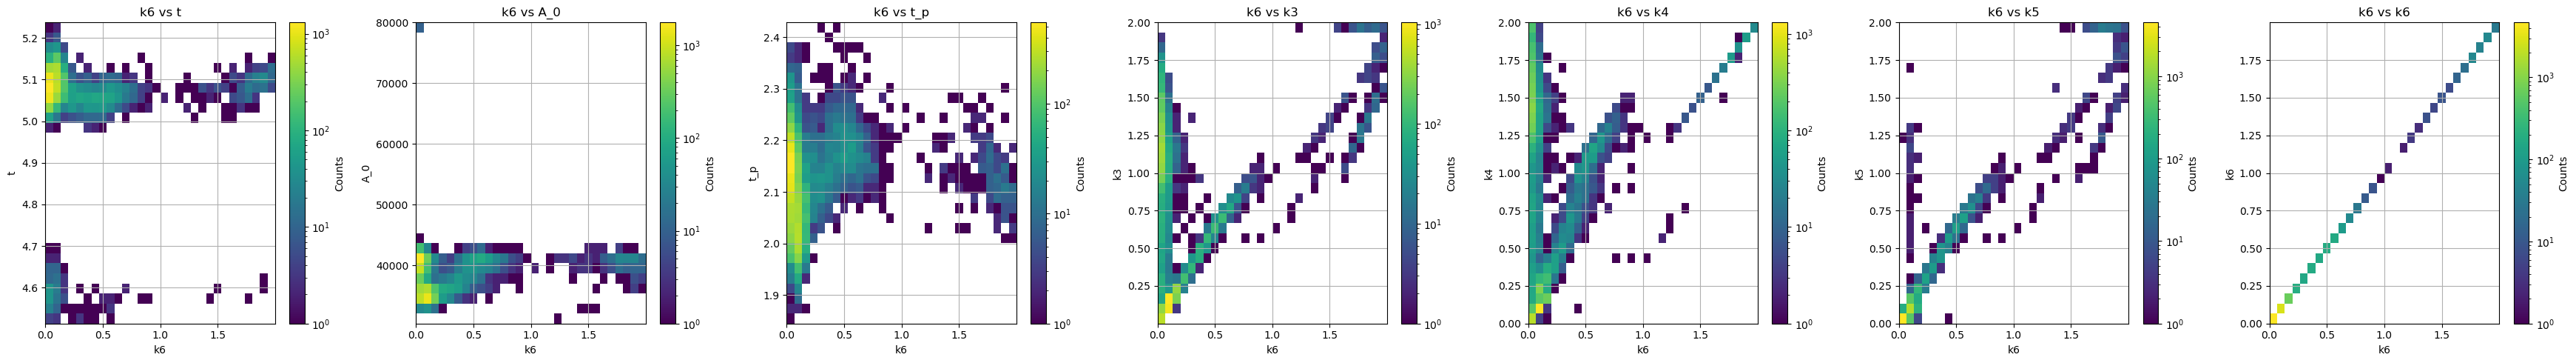

In [91]:
visualize(data=data_df, columns=cols_of_interest, type='corr')

## Multivariate Gaussian Distribution
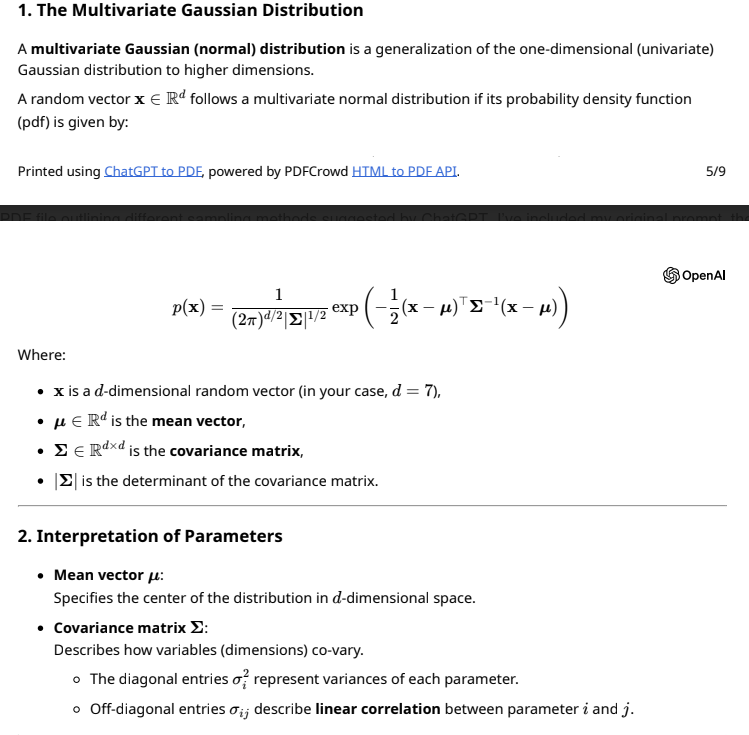 <br/>
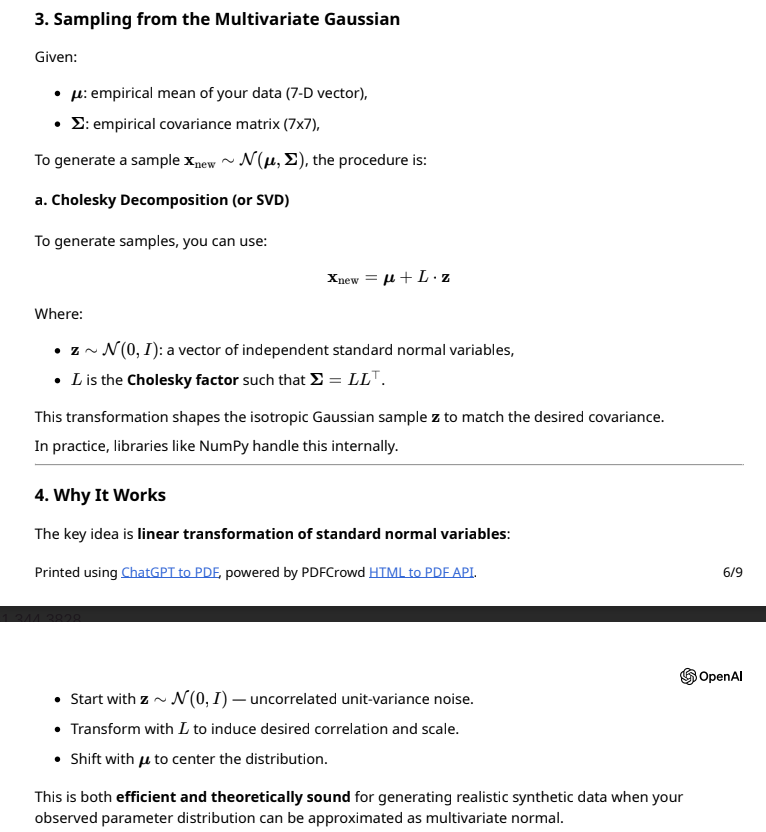

In [92]:
def MultivariateGaussian(df, columns, n_samples):
    data = df[columns].to_numpy()
    mean = np.mean(data, axis=0)
    cov = np.cov(data, rowvar=False)
    samples = multivariate_normal(mean, cov, n_samples)
    new_df = pd.DataFrame(samples, columns=columns)
    return new_df

In [93]:
multivar_df = MultivariateGaussian(df=data_df, columns=cols_of_interest, n_samples=10000)

In [94]:
multivar_df

,t,A_0,t_p,k3,k4,k5,k6
0,5.110439,40463.358218,2.209914,0.717996,1.028058,0.364951,0.346680
1,5.115424,42177.270194,2.165054,1.539978,1.768758,0.279387,0.324406
2,5.123677,39934.401771,2.101284,0.708729,1.032301,-0.747904,-0.826472
3,4.976488,37717.831172,2.149325,1.047881,1.229921,0.020656,0.038184
4,5.077674,39378.548773,2.134533,1.067134,1.276285,0.689395,0.675507
...,...,...,...,...,...,...,...
9995,5.212336,34854.928213,1.925148,0.342552,0.373026,-0.390394,-0.461409
9996,5.106120,34606.662653,1.980993,0.175424,0.032559,-0.157078,-0.030742
9997,5.059334,38407.574044,2.128744,0.279442,0.348728,-0.078087,-0.071691
9998,5.014906,37350.624375,2.142110,0.624757,0.739931,-0.162186,-0.106572


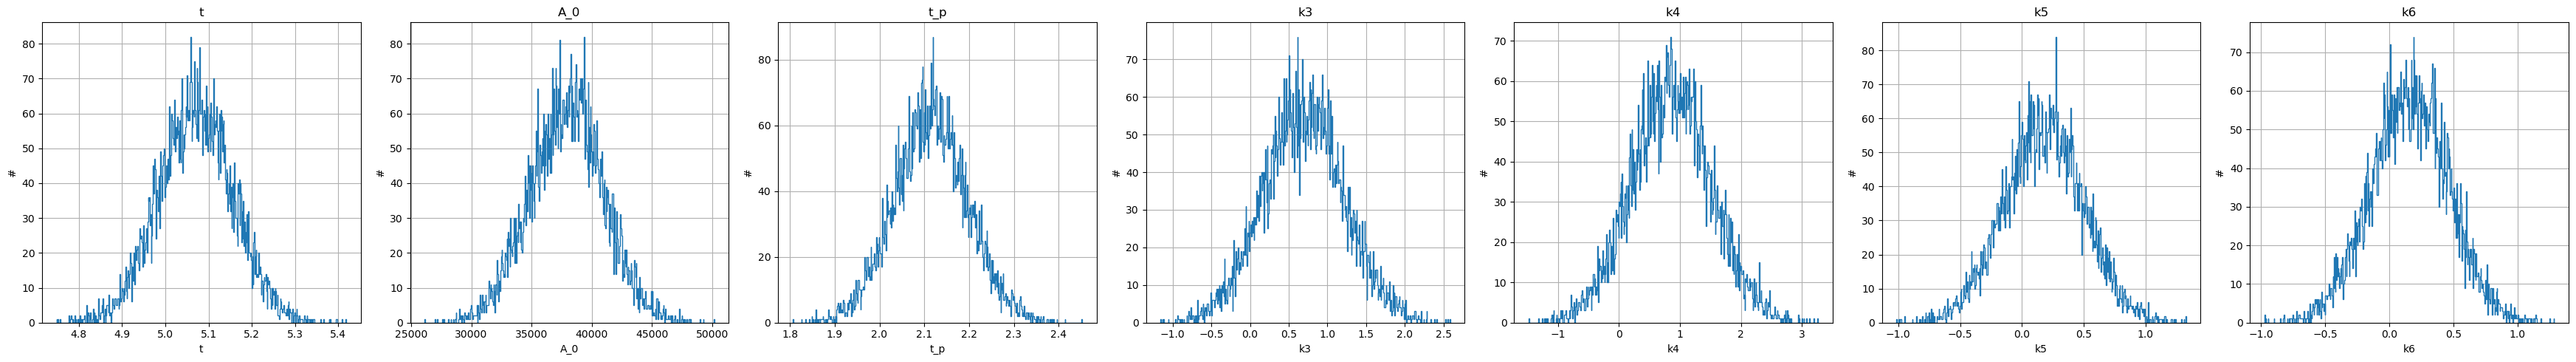

In [95]:
visualize(data=multivar_df, columns=cols_of_interest, type='hist')

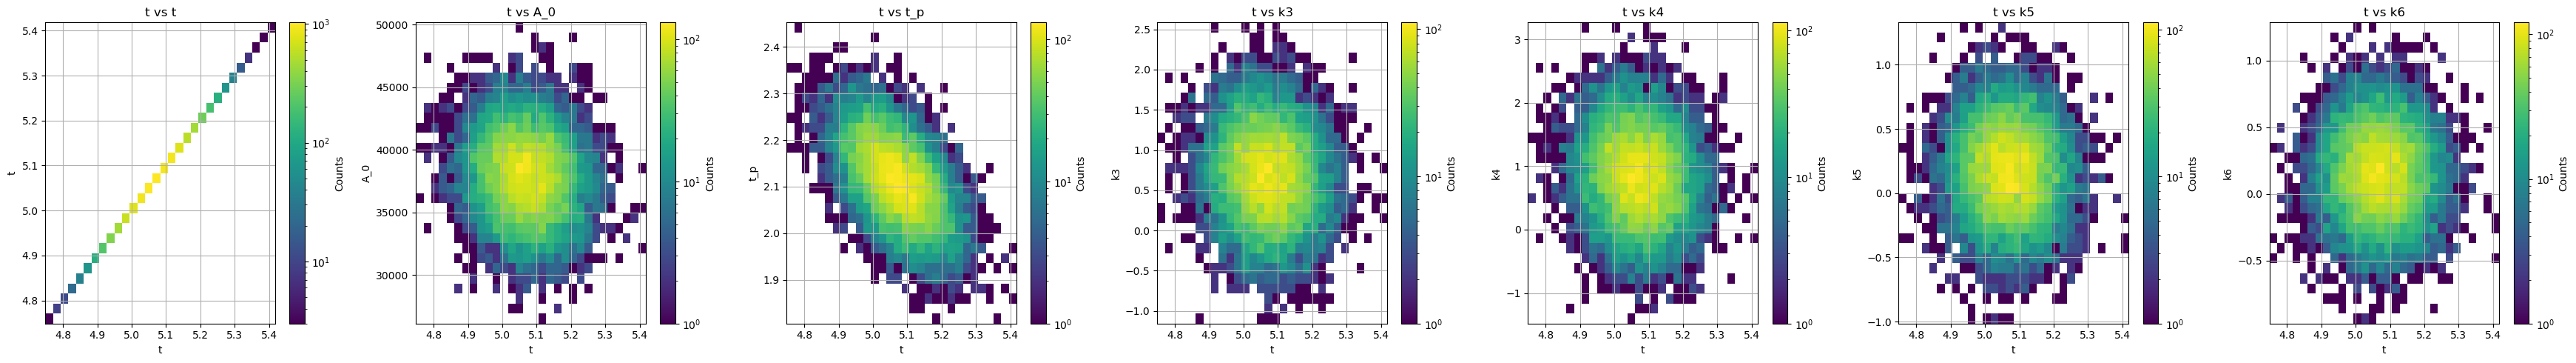

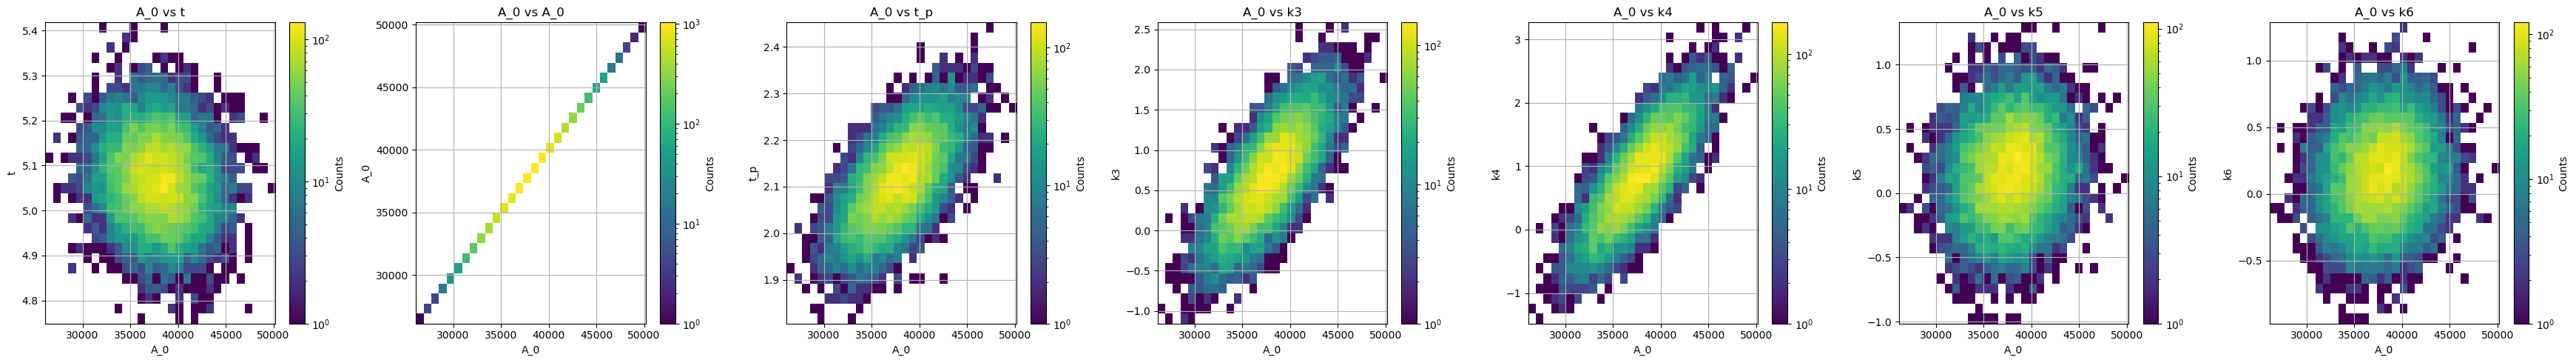

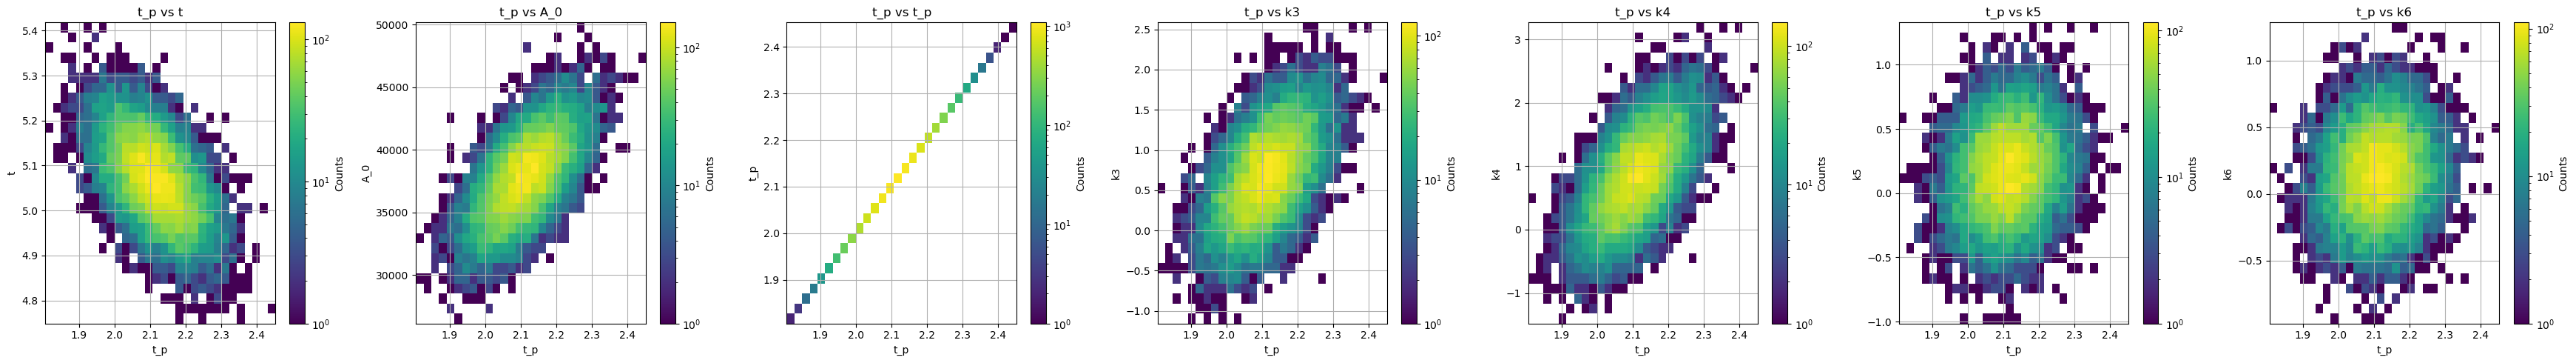

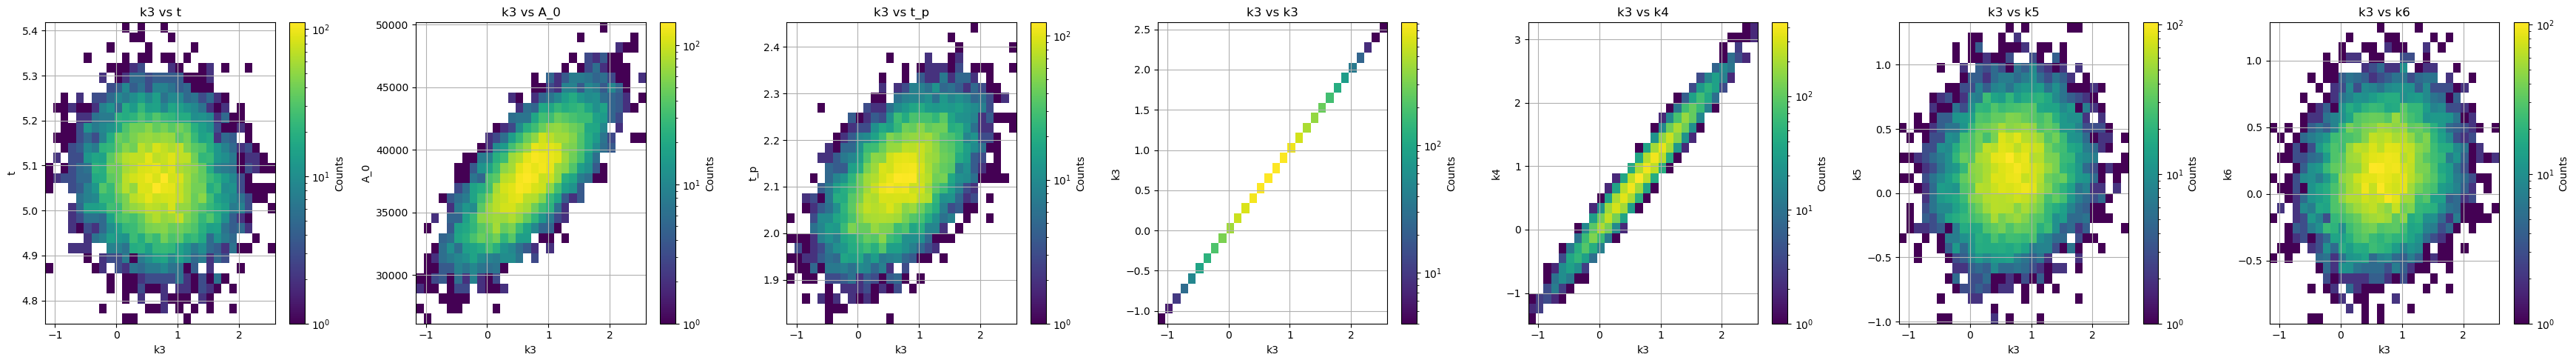

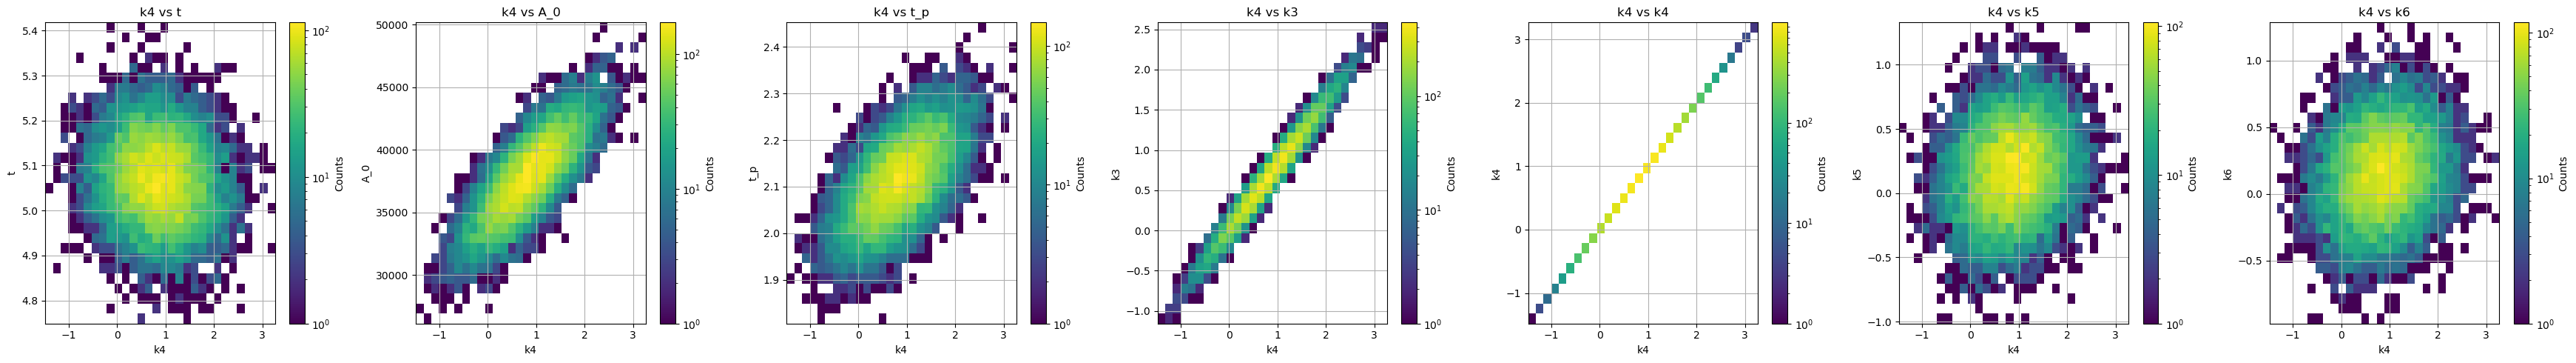

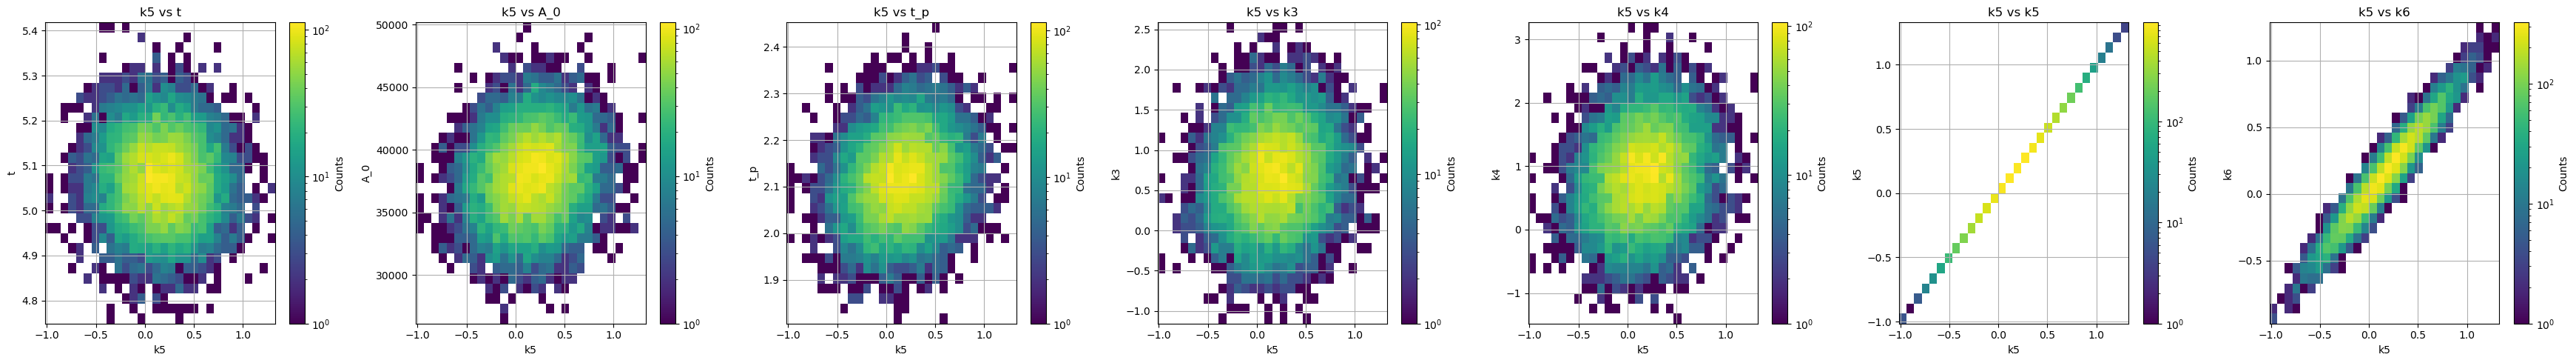

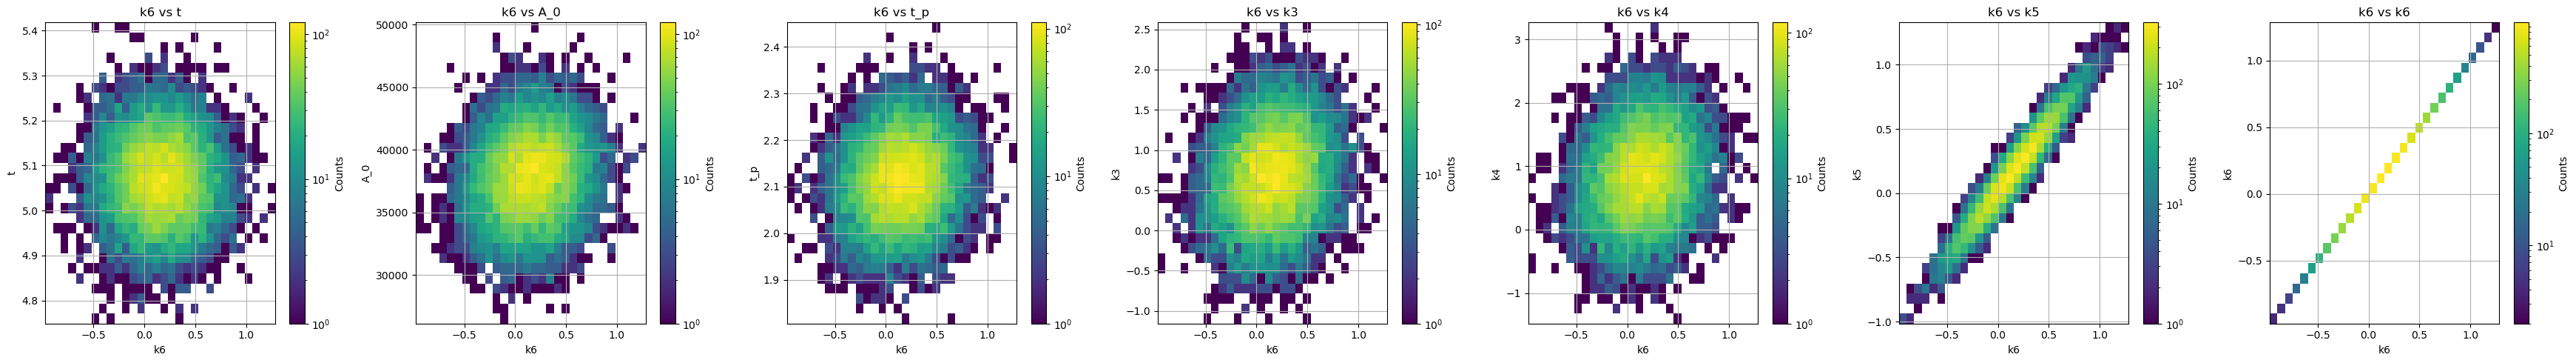

In [96]:
visualize(data=multivar_df, columns=cols_of_interest, type='corr')

## Kernel Density Estimation
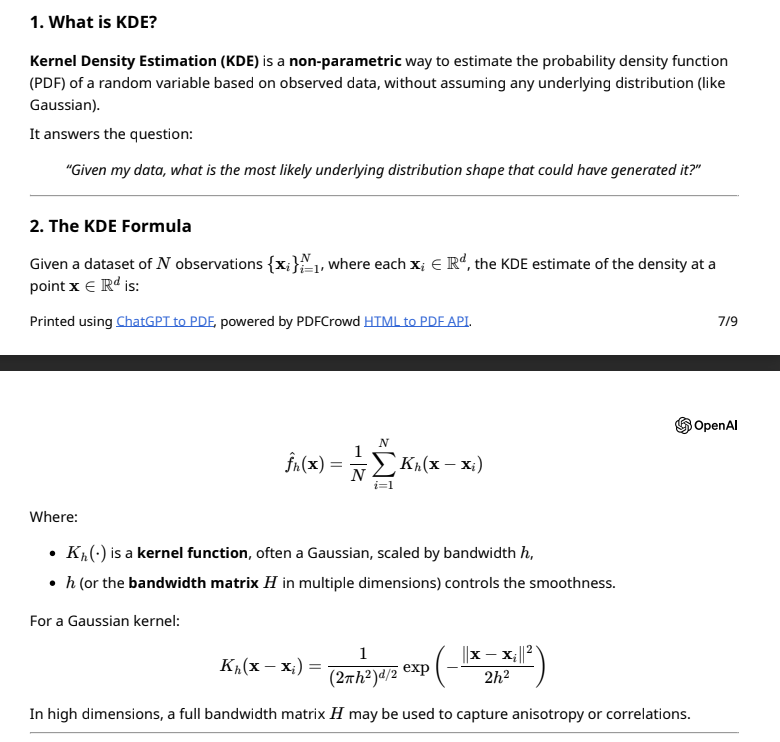 <br/>
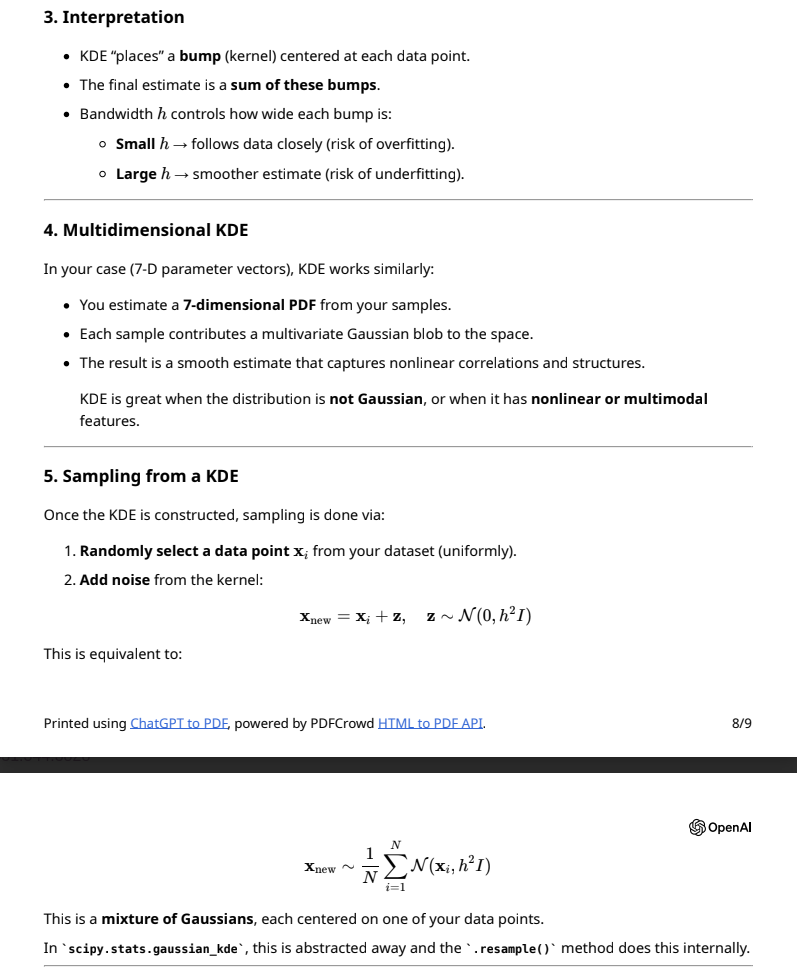

In [97]:
from scipy.stats import gaussian_kde
def KDE_sampling(df, columns, n_samples):
    data = df[columns].to_numpy()

    data_T = data.T
    kde = gaussian_kde(data_T, bw_method='scott')
    new_samples = kde.resample(n_samples)
    new_samples = new_samples.T
    new_df = pd.DataFrame(new_samples, columns=columns)
    return new_df

In [98]:
kde_df = KDE_sampling(df=data_df, columns=cols_of_interest, n_samples=10000)

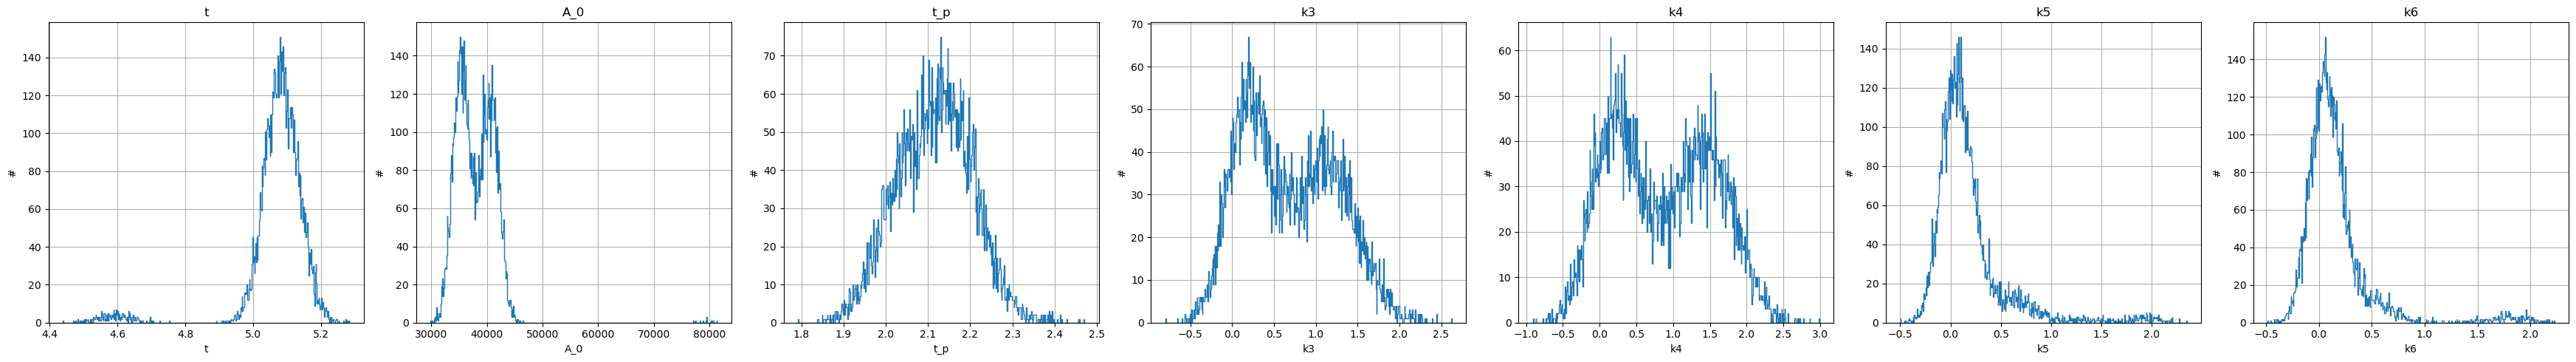

In [99]:
visualize(data=kde_df, columns=cols_of_interest, type='hist')

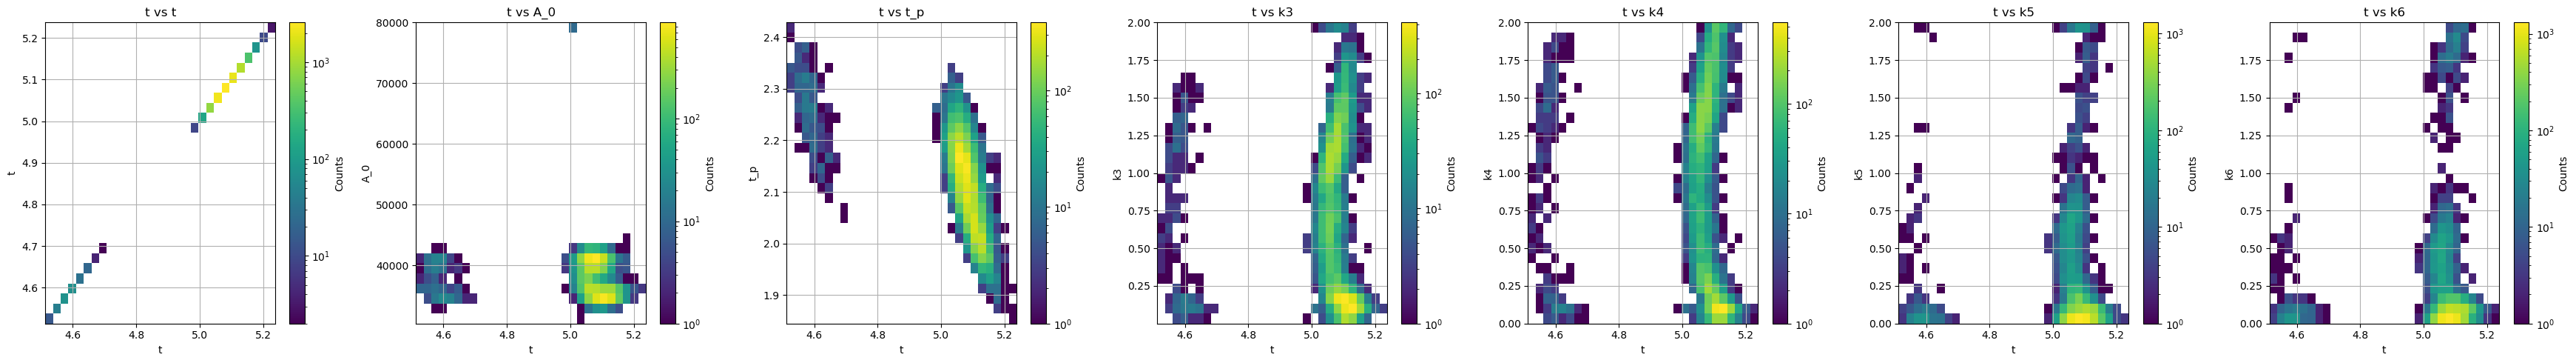

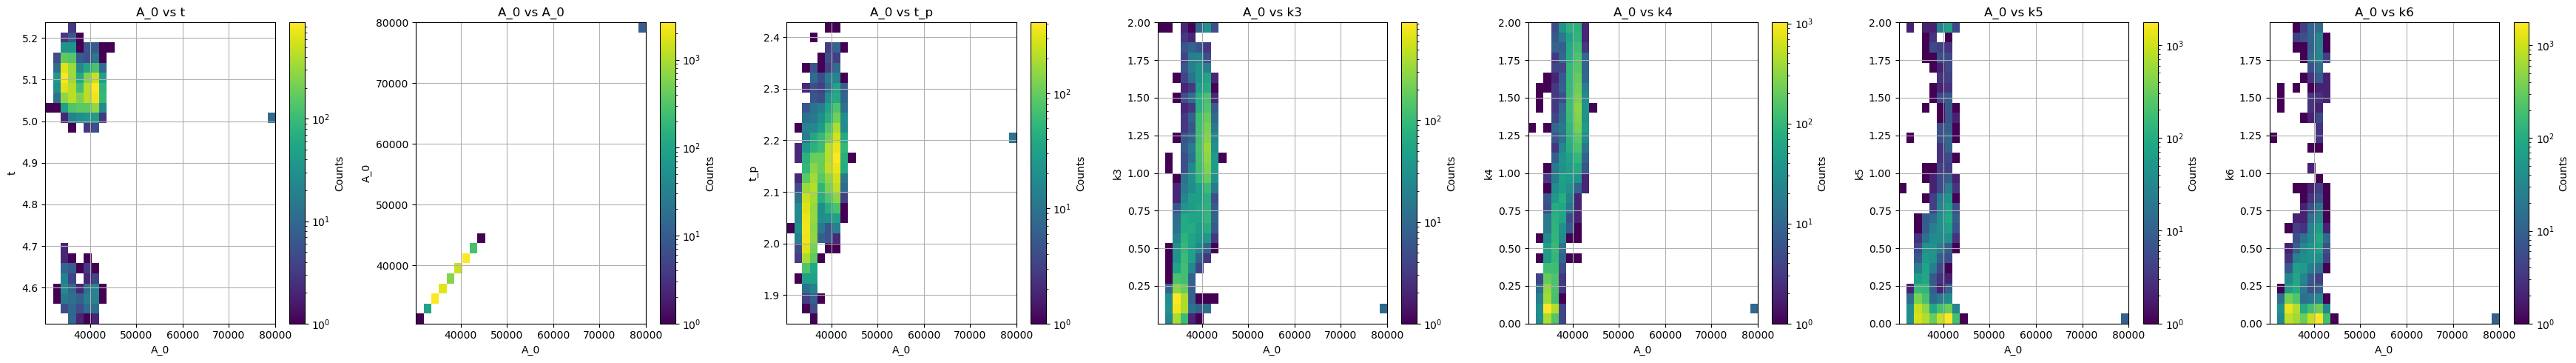

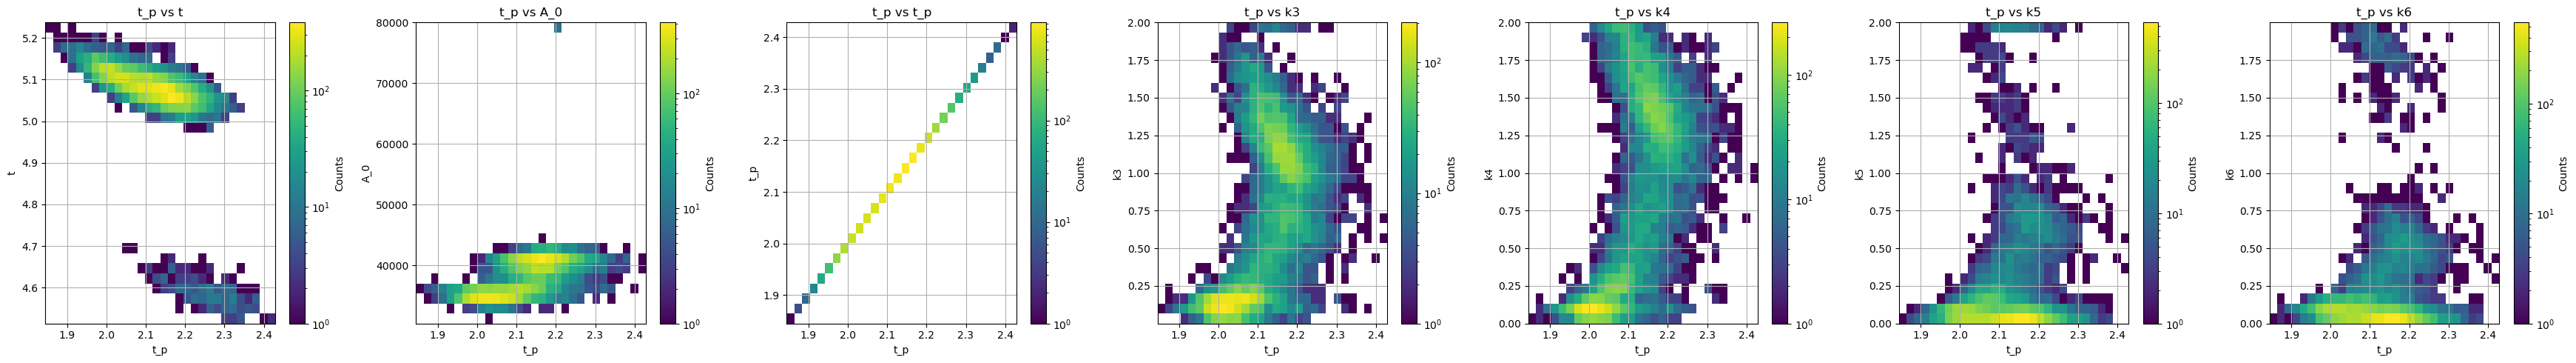

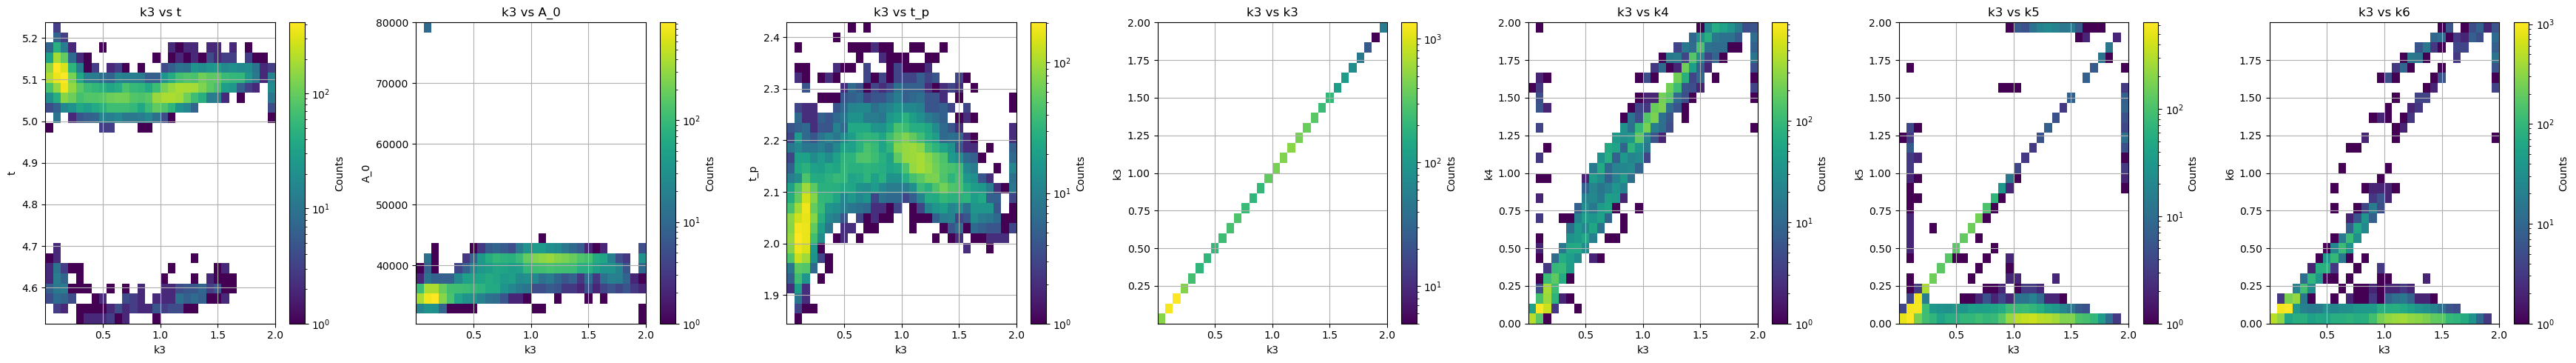

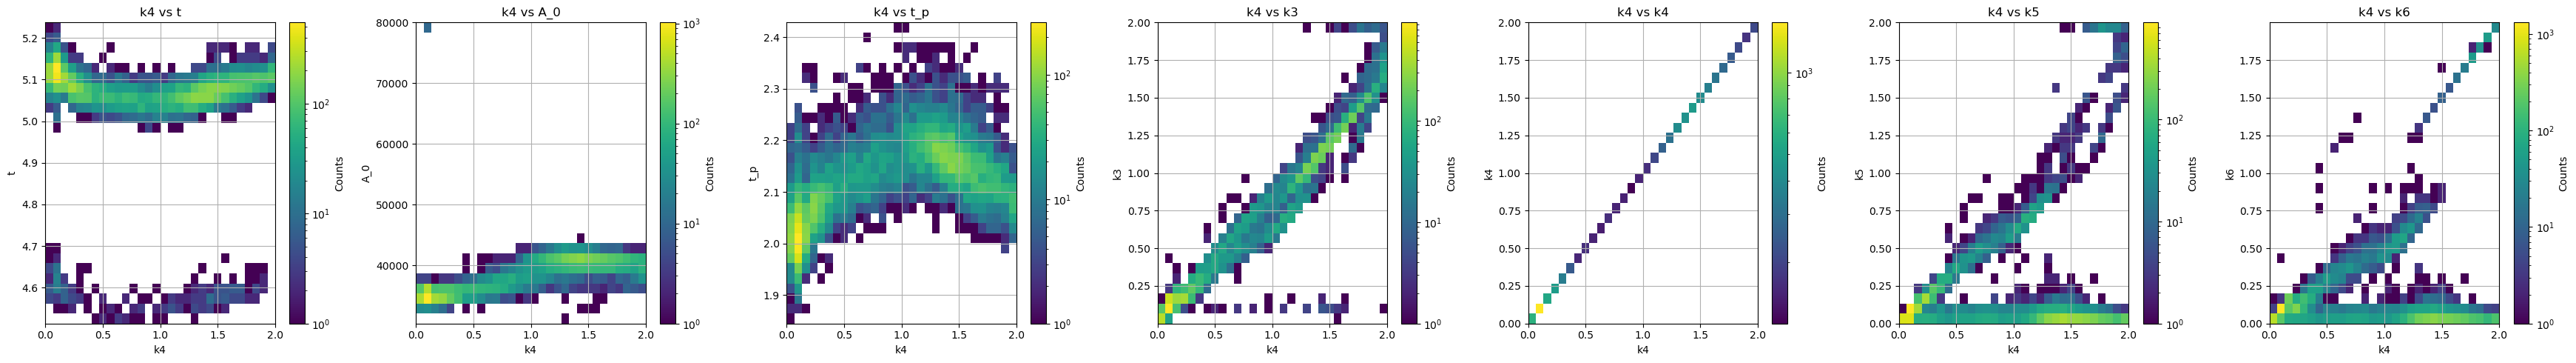

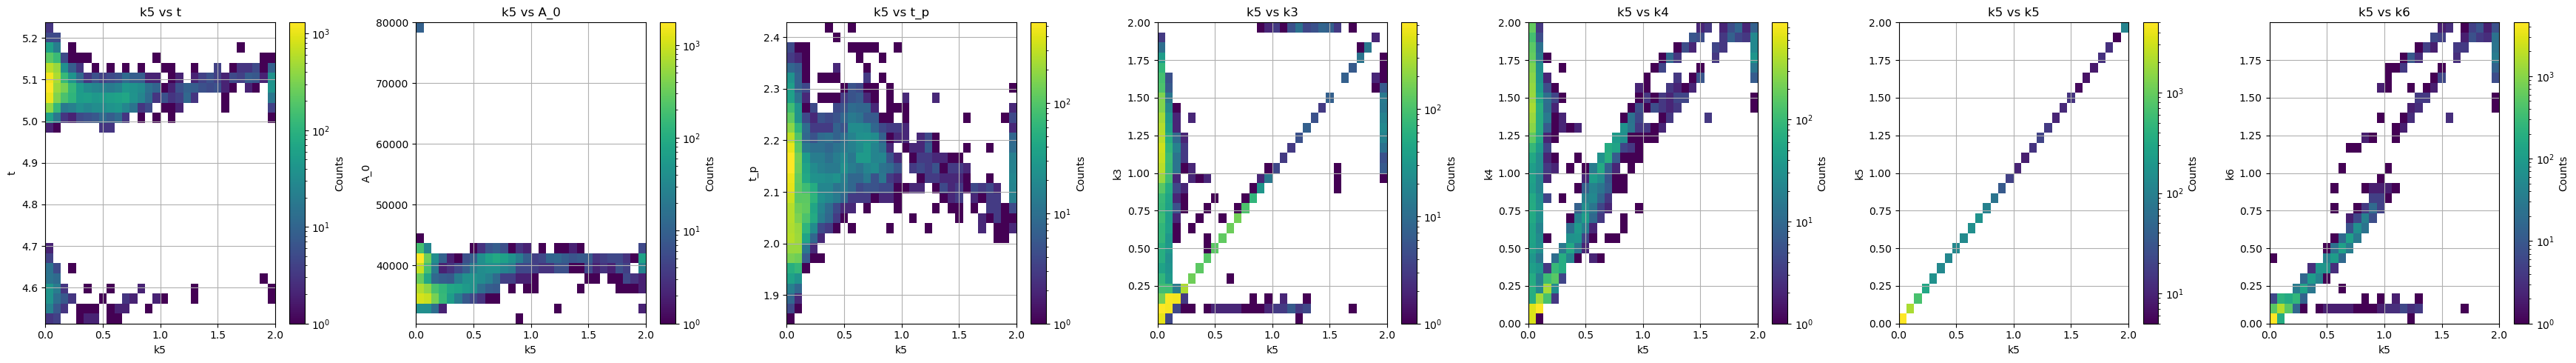

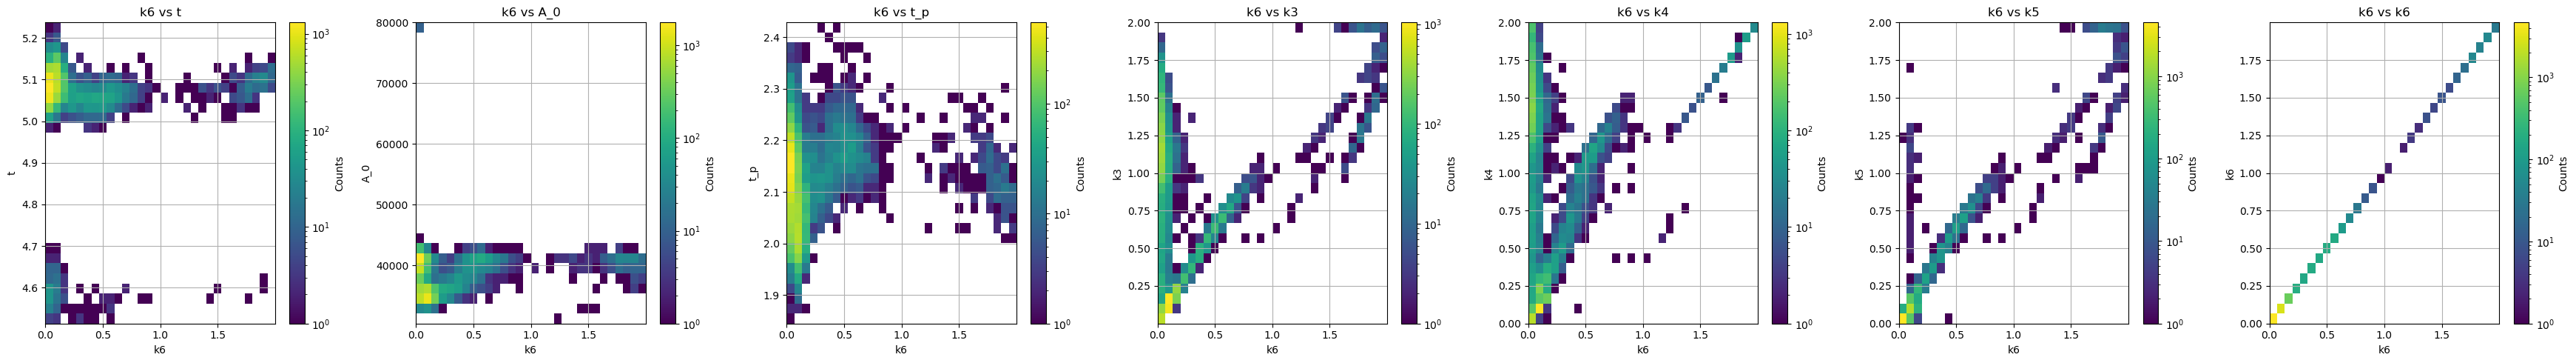

In [100]:
visualize(data=data_df, columns=cols_of_interest, type='corr')

**From the distributions of the parameters and the plots of the correlation between them, I think I can say that the KDE sampling is the way to go. I still need to validate the result to the BDT to see if that improves our results though.**